<a href="https://colab.research.google.com/github/nisha-s10/Deep-Learning-Lab-AFI524/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 2: Load MNIST Dataset

In [ ]:
# Load MNIST (70,000 images of 28x28)
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data.to_numpy().astype(np.float32)
y = mnist.target.to_numpy().astype(int)

print("Dataset shape:", X.shape)

Dataset shape: (70000, 784)


# Step 3: Normalize Data

In [ ]:
X = X / 255.0   # Normalize pixel values

# Step 4: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Sample MNIST Images

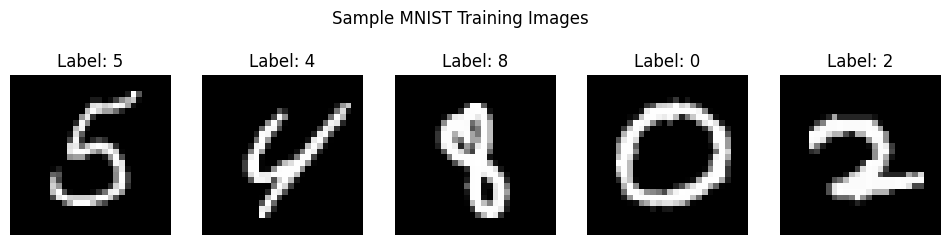

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.suptitle("Sample MNIST Training Images")
plt.show()

# Step 5: One-Hot Encode Labels

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))

# Step 6: Initialize Neural Network Parameters
**Architecture:**


* Input layer: 784 neurons
* Hidden layer: 128 neurons
* Output layer: 10 neurons

In [ ]:
np.random.seed(42)

input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Neural Network Architecture (Input → Hidden → Output)

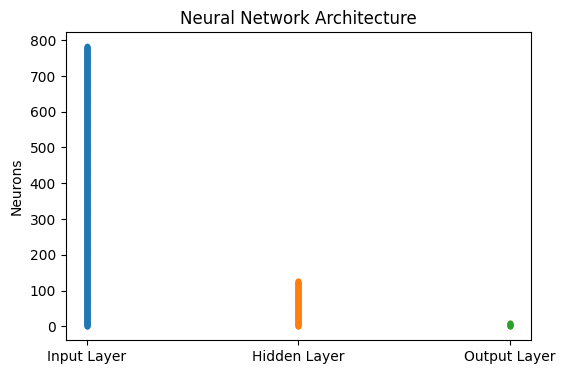

In [ ]:
import matplotlib.pyplot as plt

layers = [784, 128, 10]
layer_names = ["Input Layer", "Hidden Layer", "Output Layer"]

plt.figure(figsize=(6, 4))

for i, layer_size in enumerate(layers):
    y = range(layer_size)
    x = [i] * layer_size
    plt.scatter(x, y, s=10)

plt.xticks(range(len(layers)), layer_names)
plt.ylabel("Neurons")
plt.title("Neural Network Architecture")
plt.show()


#

# Step 7: Activation Functions

In [ ]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Step 8: Forward Propagation

In [ ]:
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

# Step 9: Loss Function (Cross-Entropy)

In [ ]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

# Step 10: Backpropagation

In [ ]:
def backward(X, y, z1, a1, a2):
    global W1, b1, W2, b2
    m = X.shape[0]

    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Step 11: Training the Neural Network

In [ ]:
epochs = 10
batch_size = 64

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_oh[i:i+batch_size]

        z1, a1, z2, a2 = forward(X_batch)
        loss = compute_loss(y_batch, a2)
        backward(X_batch, y_batch, z1, a1, a2)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

Epoch 1/10, Loss: 1.1404
Epoch 2/10, Loss: 0.6591
Epoch 3/10, Loss: 0.5556
Epoch 4/10, Loss: 0.5053
Epoch 5/10, Loss: 0.4734
Epoch 6/10, Loss: 0.4477
Epoch 7/10, Loss: 0.4258
Epoch 8/10, Loss: 0.4065
Epoch 9/10, Loss: 0.3881
Epoch 10/10, Loss: 0.3707


# Training Loss vs Epoch Plot

Epoch 1/10, Loss: 0.3534
Epoch 2/10, Loss: 0.3361
Epoch 3/10, Loss: 0.3191
Epoch 4/10, Loss: 0.3026
Epoch 5/10, Loss: 0.2867
Epoch 6/10, Loss: 0.2720
Epoch 7/10, Loss: 0.2583
Epoch 8/10, Loss: 0.2461
Epoch 9/10, Loss: 0.2349
Epoch 10/10, Loss: 0.2244


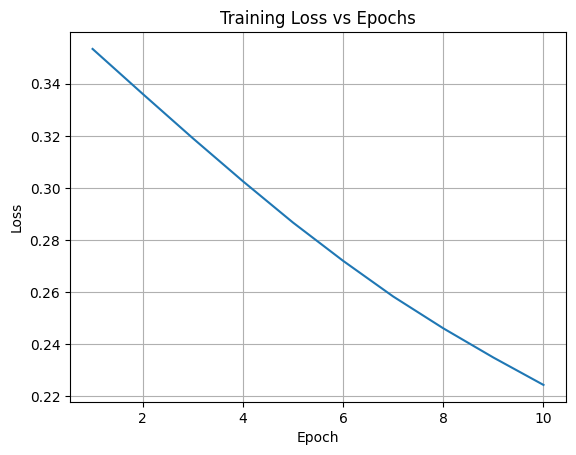

In [ ]:
# Modify Training Code (store loss)
losses = []

epochs = 10
batch_size = 64

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_oh[i:i+batch_size]

        z1, a1, z2, a2 = forward(X_batch)
        loss = compute_loss(y_batch, a2)
        backward(X_batch, y_batch, z1, a1, a2)

    losses.append(loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

# Plot Loss Curve
plt.plot(range(1, epochs+1), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.grid(True)
plt.show()

# Visualize Learned Weights

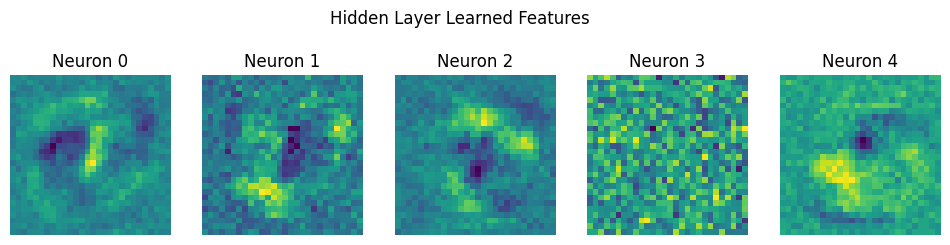

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i, ax in enumerate(axes):
    weight_image = W1[:, i].reshape(28, 28)
    ax.imshow(weight_image, cmap='viridis')
    ax.set_title(f"Neuron {i}")
    ax.axis('off')

plt.suptitle("Hidden Layer Learned Features")
plt.show()

# Step 12: Model Evaluation

In [ ]:
def accuracy(X, y):
    _, _, _, a2 = forward(X)
    predictions = np.argmax(a2, axis=1)
    return np.mean(predictions == y)

print("Training Accuracy:", accuracy(X_train, y_train))
print("Testing Accuracy:", accuracy(X_test, y_test))

Training Accuracy: 0.942625
Testing Accuracy: 0.9397857142857143


# Accuracy Bar Chart

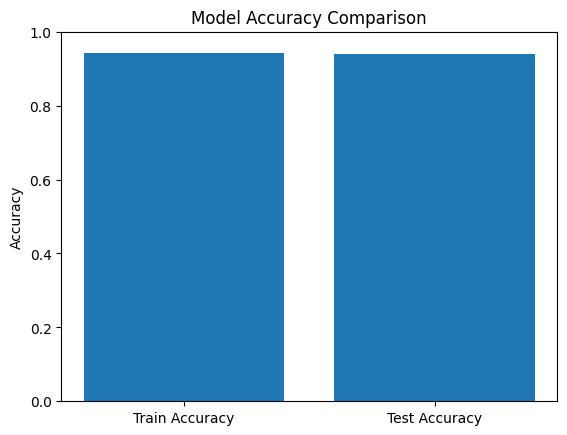

In [ ]:
train_acc = accuracy(X_train, y_train)
test_acc = accuracy(X_test, y_test)

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

# Step 13: Test on a Sample Image

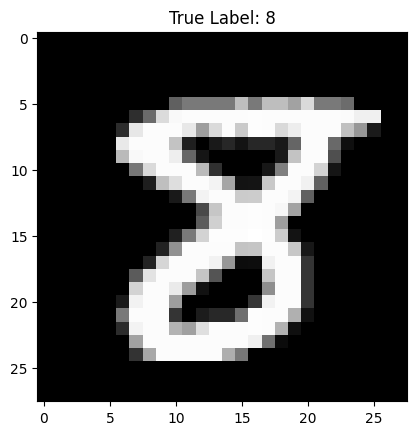

Predicted Label: 8


In [ ]:
index = 0
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[index]}")
plt.show()

_, _, _, pred = forward(X_test[index].reshape(1, -1))
print("Predicted Label:", np.argmax(pred))

# Prediction Visualization (Correct vs Wrong)

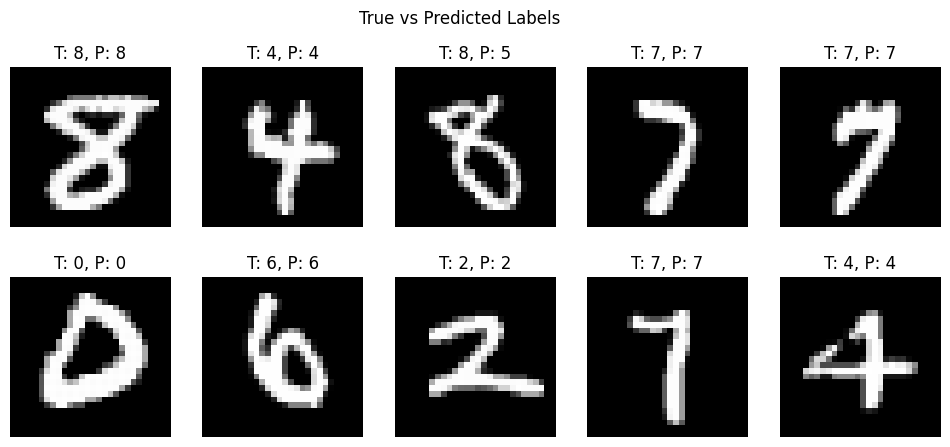

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flatten()):
    img = X_test[i]
    true_label = y_test[i]

    _, _, _, pred = forward(img.reshape(1, -1))
    predicted_label = np.argmax(pred)

    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f"T: {true_label}, P: {predicted_label}")
    ax.axis('off')

plt.suptitle("True vs Predicted Labels")
plt.show()

# Visualize Predictions Flow (Input → Output)

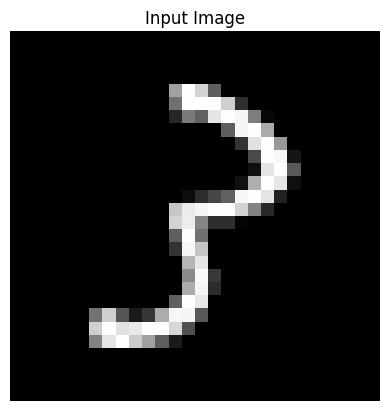

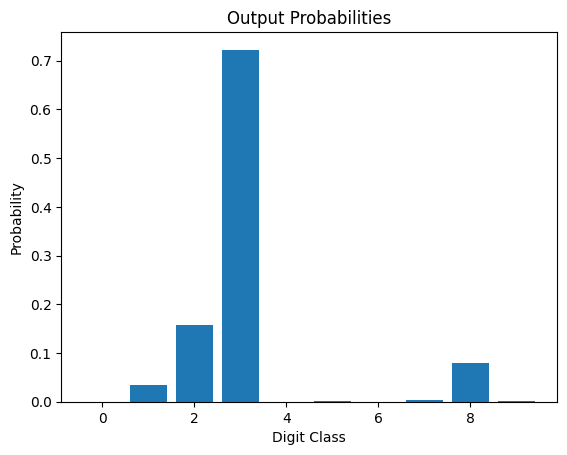

In [ ]:
index = 10
image = X_test[index]

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

_, _, _, output = forward(image.reshape(1, -1))

plt.bar(range(10), output.flatten())
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.title("Output Probabilities")
plt.show()